<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK16_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PCA_country_data**

In [1]:
!pip install kneed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, SpectralClustering, DBSCAN, AffinityPropagation, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from kneed import KneeLocator

#### Enter Data

In [3]:
data=pd.read_csv('/content/drive/MyDrive/ESAA YB/dataset/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data['exports']=data['exports']*data['gdpp']/100
data['imports']=data['imports']*data['gdpp']/100
data['health']=data['health']*data['gdpp']/100

In [5]:
data.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
data.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
columns=list(data.columns)
for location, value in enumerate(columns):
  print(location,':',value)

0 : country
1 : child_mort
2 : exports
3 : health
4 : imports
5 : income
6 : inflation
7 : life_expec
8 : total_fer
9 : gdpp


#### Plots

In [11]:
country=data.country

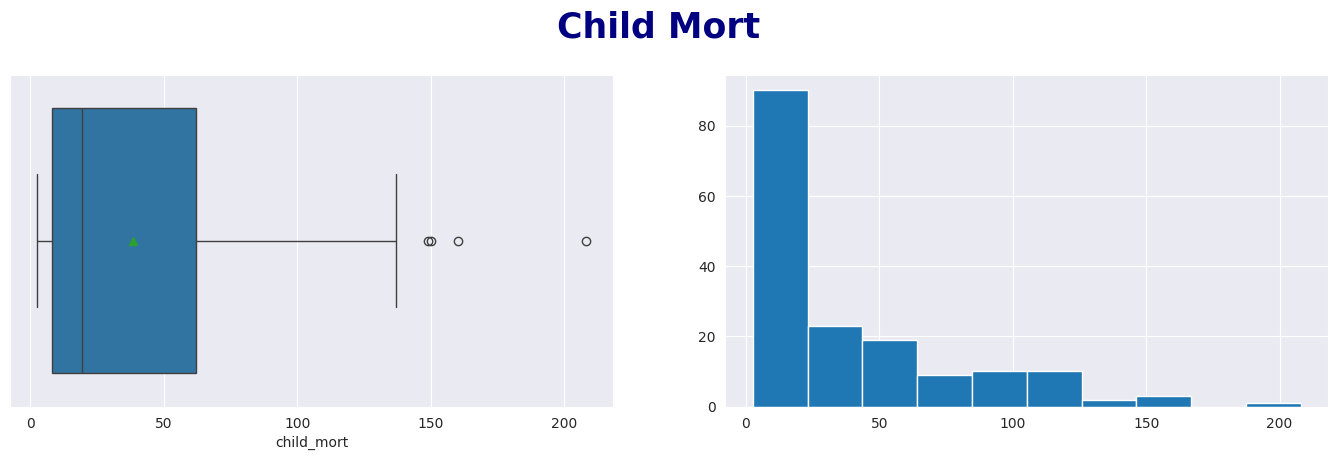

In [18]:
# column 1 = child_mort

fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.tight_layout(pad=5.0)
fig.suptitle('Child Mort',fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.child_mort, showmeans=True, orient='h')

# ax[1]
data.child_mort.hist().set(xticks=range(0,250,50))
plt.show()

In [19]:
data[data.child_mort>200]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662


maybe its normal

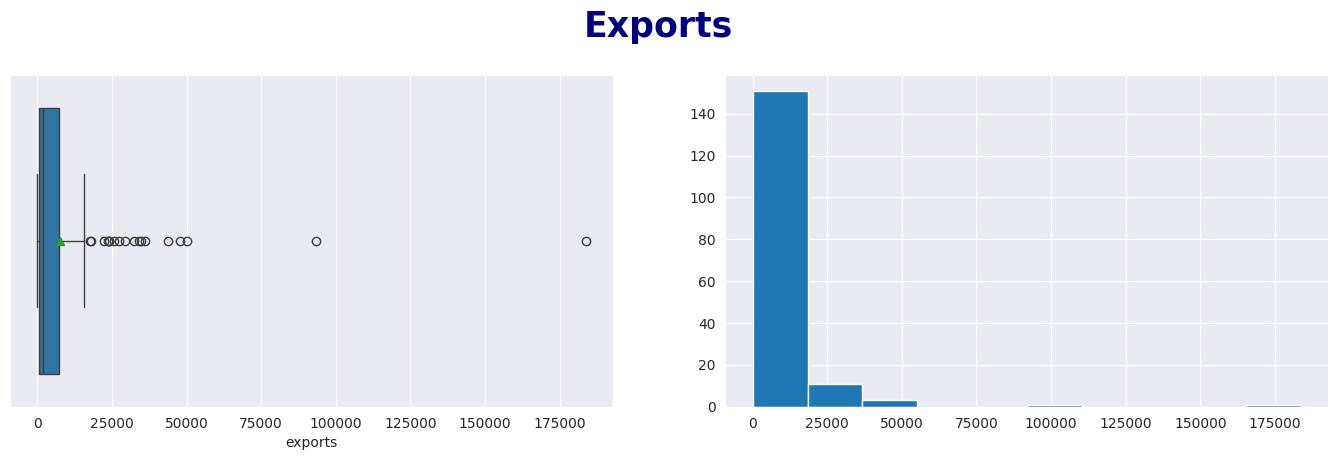

In [20]:
# column 2 = child_mort
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('Exports', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.exports, showmeans=True, orient='h')

# ax[1]
data.exports.hist()
plt.show()

In [21]:
data[data.exports > 125]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.605,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.604,1050.62,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.858,450.64,4480,23.60,67.5,4.67,1310


maybe its ok too

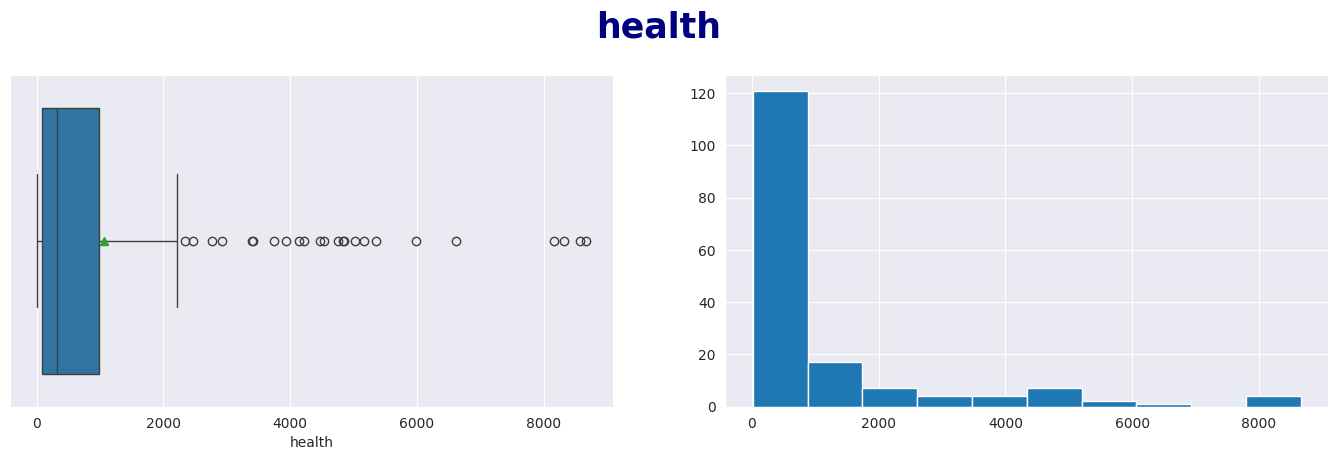

In [23]:
# column 3 = health
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('health', fontweight='bold', fontsize=25.0, color='navy')

# ax[0]
sns.boxplot(ax=ax[0], data=data.health, showmeans=True, orient='h')

# ax[1]
data.health.hist()
plt.show()

In [24]:
data[data.health > 14]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


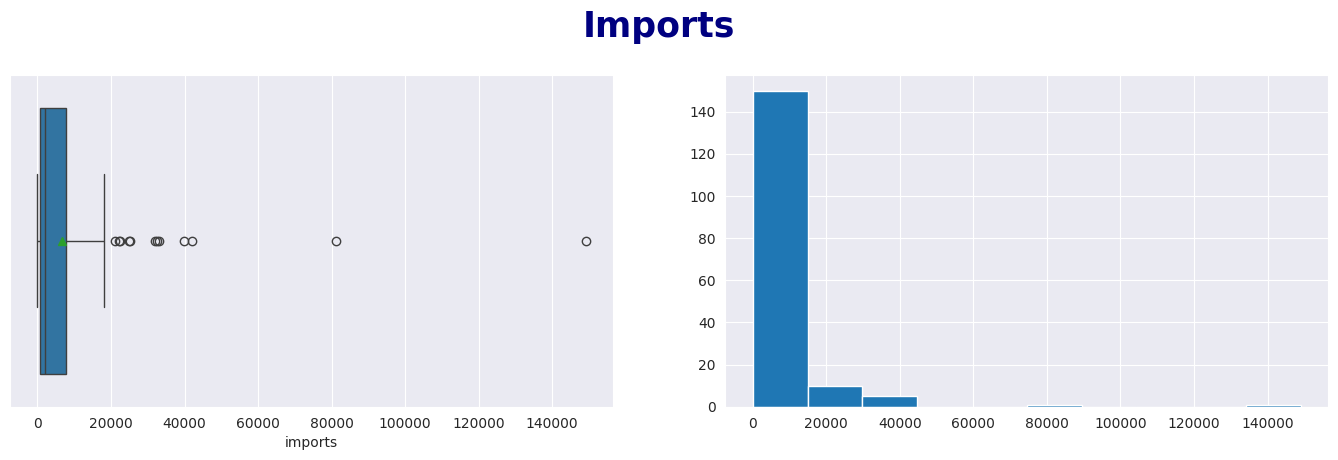

In [25]:
# column 4 = imports
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('Imports', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.imports, showmeans=True, orient='h')

# ax[1]
data.imports.hist()
plt.show()

In [26]:
data[data.imports > 125]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


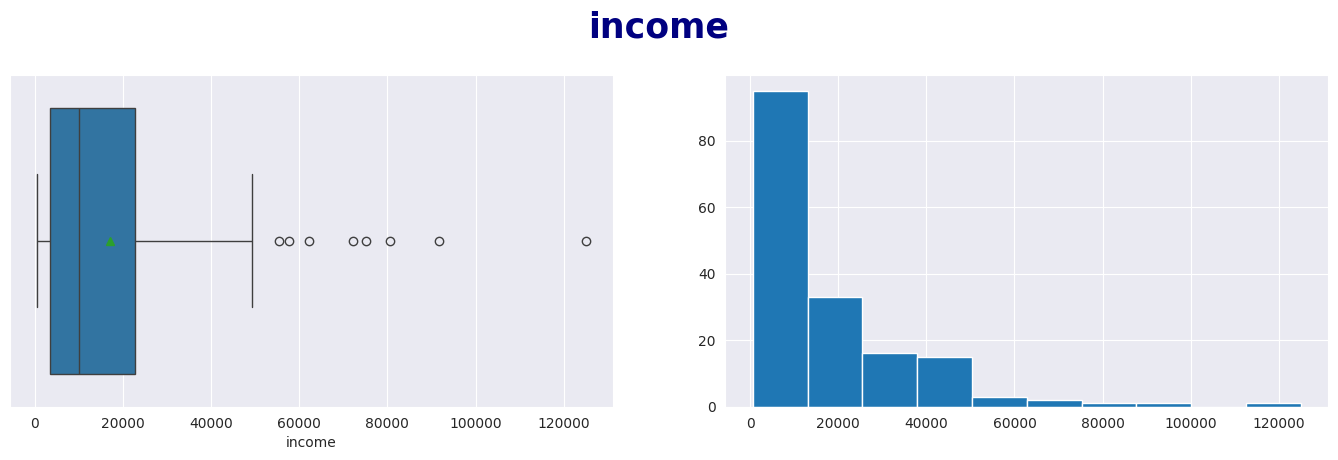

In [27]:
# column 5 = income
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('income', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.income, showmeans=True, orient='h')

# ax[1]
data.income.hist()
plt.show()

In [28]:
data[data.income > 60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


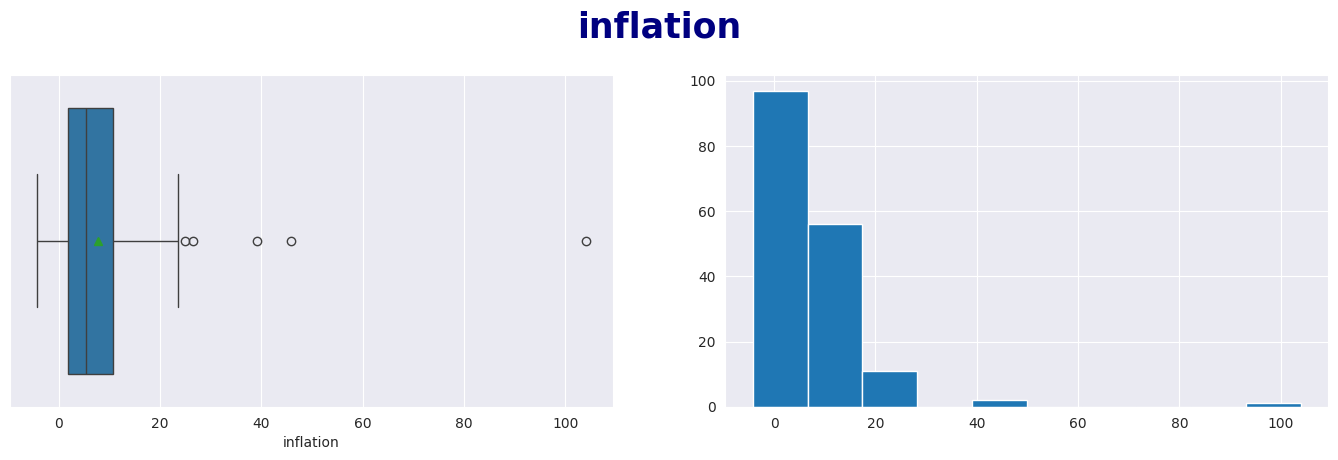

In [29]:
# column 6 = inflation
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('inflation', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.inflation, showmeans=True, orient='h')

# ax[1]
data.inflation.hist()
plt.show()

In [30]:
data[data.inflation > 40]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500


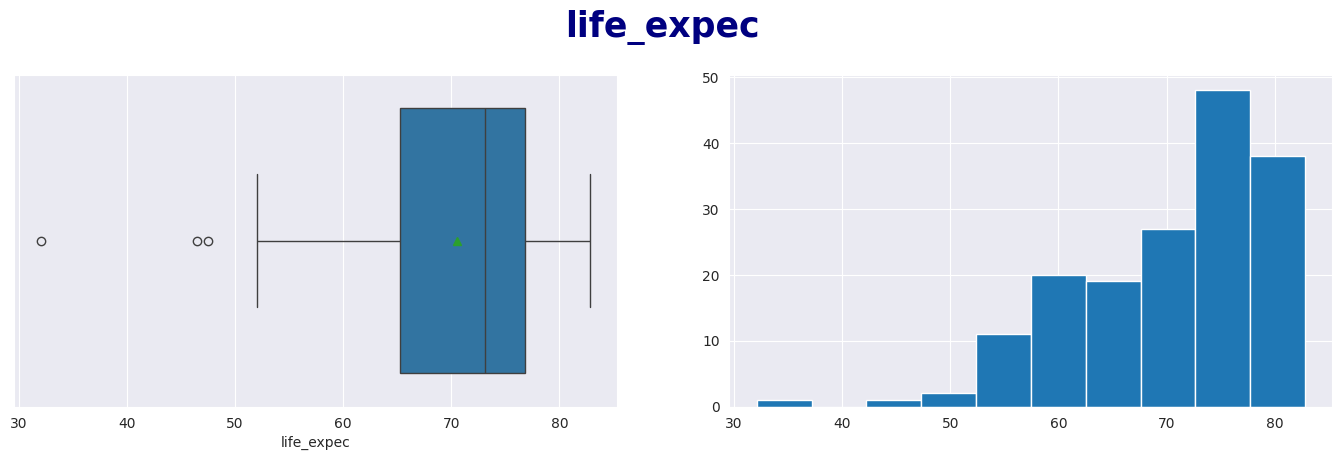

In [31]:
# column 7 = life_expec
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('life_expec', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.life_expec, showmeans=True, orient='h')

# ax[1]
data.life_expec.hist()
plt.show()

In [32]:
data[data.life_expec < 50]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170


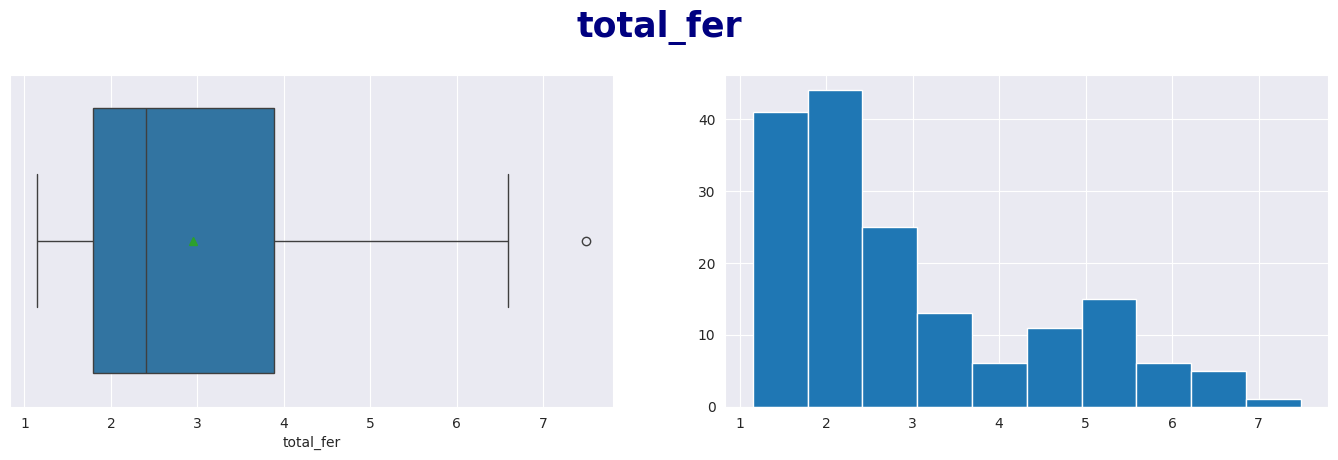

In [33]:
# column 8 = total_fer
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('total_fer', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.total_fer, showmeans=True, orient='h')

# ax[1]
data.total_fer.hist()
plt.show()

In [34]:
data[data.total_fer > 7]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348


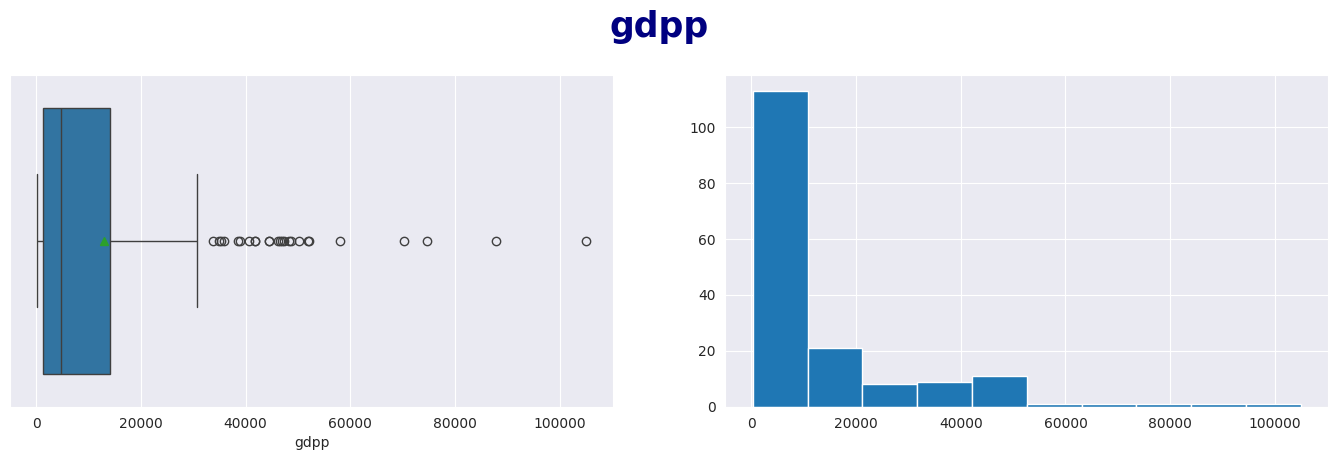

In [35]:
# column 9 = gdpp
fig , ax = plt.subplots(1, 2, figsize=(15, 5))
fig.tight_layout(pad=5.0)
fig.suptitle('gdpp', fontweight='bold', fontsize=25.0, color='navy')
# ax[0]
sns.boxplot(ax=ax[0], data=data.gdpp, showmeans=True, orient='h')

# ax[1]
data.gdpp.hist()
plt.show()

In [36]:
data[data.gdpp > 60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600


In [37]:
corelation_matrix=data.drop(columns='country').corr()
corelation_matrix.style.background_gradient(cmap='coolwarm',axis=None).format(precision=2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.00,-0.30,-0.43,-0.32,-0.52,0.29,-0.89,0.85,-0.48
exports,-0.30,1.00,0.61,0.99,0.73,-0.14,0.38,-0.29,0.77
health,-0.43,0.61,1.00,0.64,0.69,-0.25,0.55,-0.41,0.92
imports,-0.32,0.99,0.64,1.00,0.67,-0.18,0.40,-0.32,0.76
income,-0.52,0.73,0.69,0.67,1.00,-0.15,0.61,-0.50,0.90
inflation,0.29,-0.14,-0.25,-0.18,-0.15,1.00,-0.24,0.32,-0.22
life_expec,-0.89,0.38,0.55,0.40,0.61,-0.24,1.00,-0.76,0.60
total_fer,0.85,-0.29,-0.41,-0.32,-0.50,0.32,-0.76,1.00,-0.45
gdpp,-0.48,0.77,0.92,0.76,0.90,-0.22,0.60,-0.45,1.00


#### Standardization

In [38]:
data1=data.drop(columns='country')

In [39]:
standard_scaler=StandardScaler().fit_transform(data1)
df = pd.DataFrame(standard_scaler, columns=columns[1:])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.336864,-0.501562,-0.342488,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.199393,-0.219310,-0.287205,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,-0.361463,-0.538488,-0.377572,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.392166,-0.550596,-0.418479,-0.658924,1.500916,-0.344633,1.140944,-0.637754


#### PCA

In [40]:
pca=PCA(svd_solver='randomized', random_state=42, n_components=9).fit(df)
exp=pca.explained_variance_ratio_
exp

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

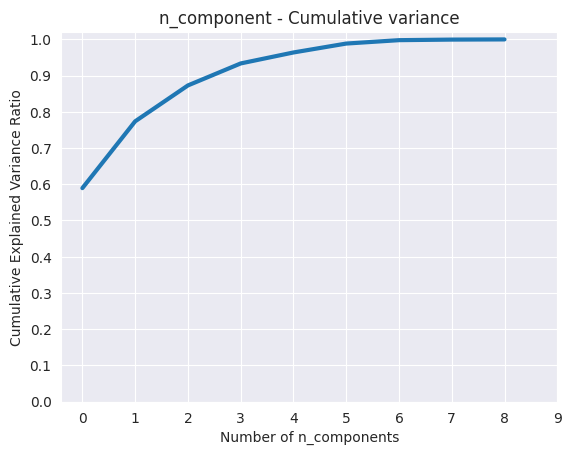

In [41]:
plt.plot(np.cumsum(exp), linewidth=3)
plt.title('n_component - Cumulative variance')
plt.xlabel('Number of n_components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(0, 10, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

n_components = 5 have 95% score

In [42]:
n = 1
for component in pca.components_:
  print('n_component = ',n)
  print(component)
  print('_'*50)
  n+=1

n_component =  1
[-0.31639186  0.34288671  0.358535    0.34486492  0.38004113 -0.14308531
  0.34385651 -0.30284224  0.39998795]
__________________________________________________
n_component =  2
[ 0.47626735  0.39731091  0.1550529   0.37078075  0.12838448  0.22126089
 -0.36981973  0.4597152   0.2006241 ]
__________________________________________________
n_component =  3
[-0.15001225 -0.03057367 -0.07570322 -0.07217386  0.14576421  0.94841868
  0.19675173 -0.07783431  0.01033941]
__________________________________________________
n_component =  4
[ 0.14805195 -0.44942527  0.59971228 -0.46179779  0.15480592  0.00762798
  0.01839465  0.21392805  0.36477239]
__________________________________________________
n_component =  5
[ 0.1019948  -0.03853829 -0.49319984 -0.2527867   0.79407469 -0.13642345
 -0.15404105 -0.02033568  0.08750149]
__________________________________________________
n_component =  6
[-0.19658519  0.03891112 -0.18069888  0.01217988  0.03814681 -0.10840284
  0.58600986  0

In [43]:
# We use n_component = 5
pca_df = pd.DataFrame({
    'Features' : columns[1:],
    'PC1' : pca.components_[0],
    'PC2' : pca.components_[1],
    'PC3' : pca.components_[2],
    'PC4' : pca.components_[3],
    'PC5' : pca.components_[4]
,})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,-0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,-0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,0.364772,0.087501


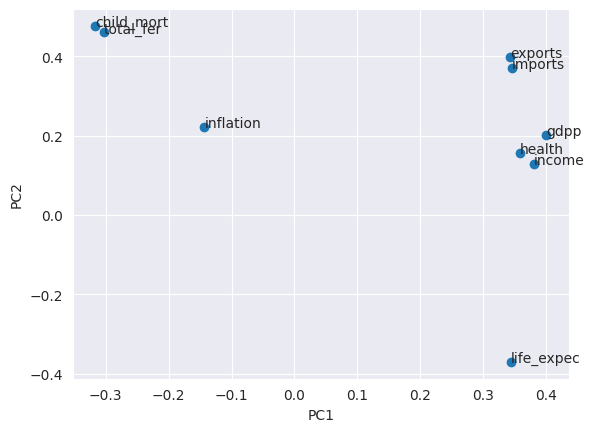

In [44]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i, txt in enumerate(pca_df.Features):
  plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.show()

Performing Incremental PCA

In [45]:
# Finally let's go ahead and do dimenstionality reduction using the four Principal Components
pca_final = IncrementalPCA(n_components=5)

In [46]:
df_pca = pca_final.fit_transform(df)
df_pca.shape

(167, 5)

Creating a transpose so that the each column is properly arranged

In [47]:
pc = np.transpose(df_pca)

Creating correlation matrix for the principal components

In [49]:
corrmat = np.corrcoef(pc)

Plotting the correlation matrix of the principal components

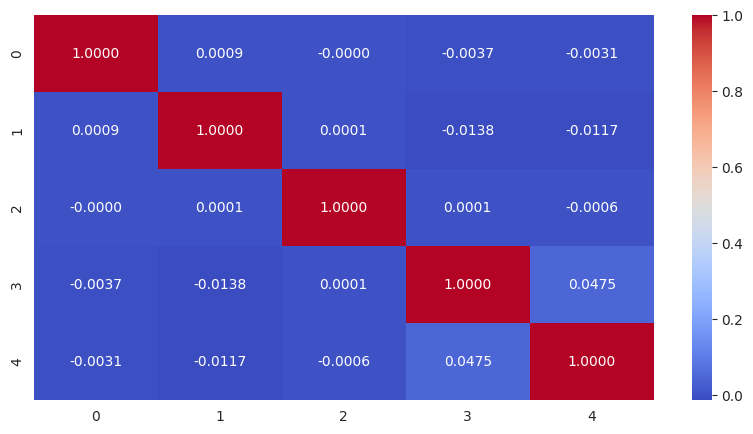

In [51]:
plt.figure(figsize=(10, 5))
sns.heatmap(corrmat, annot = True, cmap = 'coolwarm', fmt='.4f', linecolor='white')
plt.show()

- From above heat map, we can see all the compnents are not correlated to each other.

Creating the dataframe of all 5 principal components

In [52]:
pcs_df2 = pd.DataFrame({
    'PC1':pc[0],
    'PC2':pc[1],
    'PC3':pc[2],
    'PC4':pc[3],
    'PC5':pc[4],
})
pcs_df2

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


Checking outliers of all the principal complnents¶

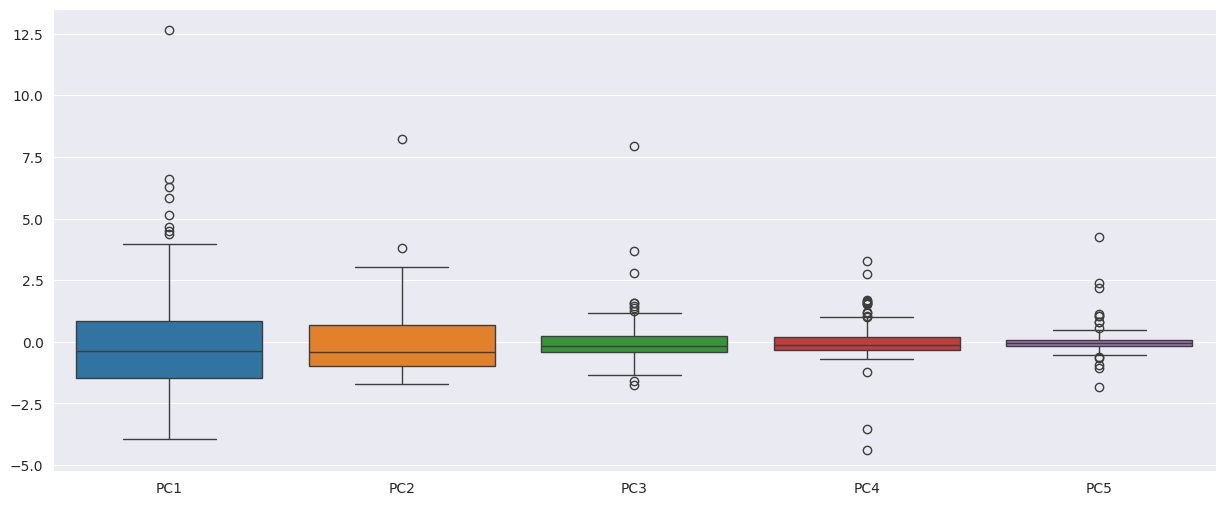

In [53]:
fig = plt.figure(figsize = (15,6))
sns.boxplot(data=pcs_df2)
plt.show()

- From above boxplots, we can see the Outliers in the data, So we will do the outlier treatment below

In [54]:
pcs_df2.shape

(167, 5)

In [55]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


#### Clustering

##### KMeans

In [58]:
kmeans_set = {
    'init' : 'random',
    'n_init' : 10,
    'max_iter' : 300,
    'random_state' : 42
}

list_kmeans = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, **kmeans_set)
  kmeans.fit(pcs_df2)
  list_kmeans.append(kmeans.inertia_)

In [59]:
list_kmeans

[888.017194134989,
 597.3390455379323,
 425.9970109879573,
 374.76183020188836,
 304.8885216367648,
 264.4638042671949,
 239.74607349406114,
 205.59588617227823]

In [60]:
print('Minimum inertia', min(list_kmeans))
print('Number of clusters :', list_kmeans.index(min(list_kmeans))+2)
print('_'*50)
print('Maximum inertia', max(list_kmeans))
print('Number of clusters :', list_kmeans.index(max(list_kmeans))+2)

Minimum inertia 205.59588617227823
Number of clusters : 9
__________________________________________________
Maximum inertia 888.017194134989
Number of clusters : 2


In [61]:
k1 = KneeLocator(range(2, 10), list_kmeans, curve='convex', direction='decreasing')
k1.elbow

np.int64(4)

KneeLocator
- knee 또는 elbow 포인트를 찾기 위해 사용하는 도구
- knee/elbow method를 사용하여 클러스터 개수(K)를 찾음

```
from kneed import KneeLocator
```

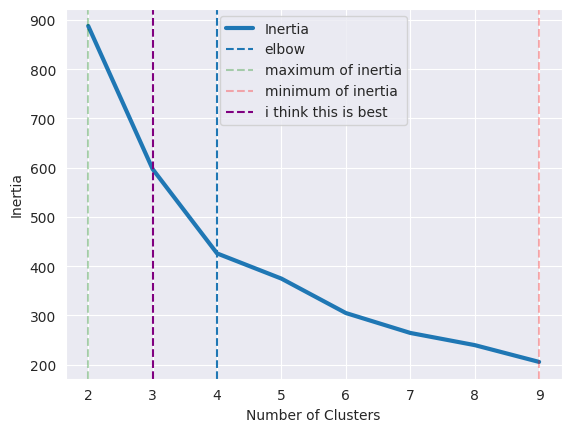

In [62]:
plt.plot(range(2, 10), list_kmeans, linewidth=3, label='Inertia')
plt.axvline(x=k1.elbow, ls='--', label='elbow')
plt.axvline(x=list_kmeans.index(max(list_kmeans))+2, alpha=0.3, ls='--',  label='maximum of inertia', color='green')
plt.axvline(x=list_kmeans.index(min(list_kmeans))+2, alpha=0.3, ls='--',  label='minimum of inertia', color='red')
plt.axvline(x=3, ls='--',  label='i think this is best', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

Sikhouette

Best Silhouette_score :  0.48066046782755917
Best n_cluster :  2


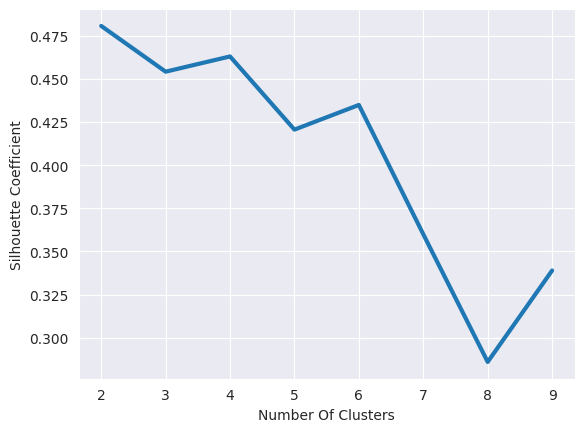

In [63]:
# Calculate silhouette score for kmeans
kmeans_sil_score = 0
kmeans_sil_n = 0
silhouette_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = silhouette_score(pcs_df2, kmeans.labels_)
    silhouette_coefficient.append(score)
    if score > kmeans_sil_score :
        kmeans_sil_score = score
        kmeans_sil_n = k
    else :
        continue
print('Best Silhouette_score : ', kmeans_sil_score)
print('Best n_cluster : ', kmeans_sil_n)

plt.plot(range(2, 10), silhouette_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

calinski_harabasz_score

calinski_harabasz_score :  130.43887698822485
Best n_cluster :  4


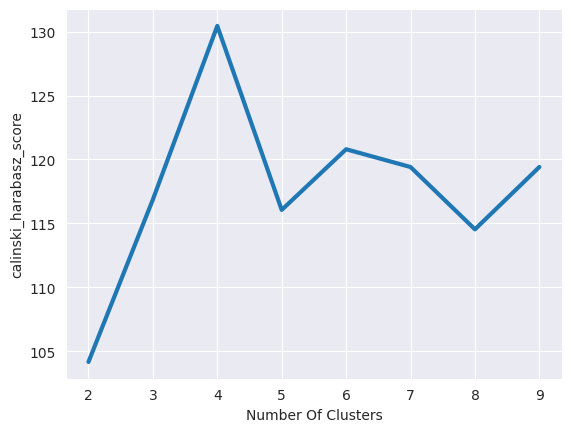

In [64]:
# Calculate calinski_harabasz_score for kmeans
kmeans_ch_score = 0
kmeans_ch_n = 0
calinski_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = calinski_harabasz_score(pcs_df2, kmeans.labels_)
    calinski_coefficient.append(score)
    if score > kmeans_ch_score :
        kmeans_ch_score = score
        kmeans_ch_n = k
    else :
        continue
print('calinski_harabasz_score : ', kmeans_ch_score)
print('Best n_cluster : ', kmeans_ch_n)

plt.plot(range(2, 10), calinski_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

- Best n_clusters = 4

In [65]:
calinski_coefficient

[np.float64(104.17791548449152),
 np.float64(116.87024325339175),
 np.float64(130.43887698822485),
 np.float64(116.05845550996203),
 np.float64(120.80007844176144),
 np.float64(119.40949463416608),
 np.float64(114.53953334000335),
 np.float64(119.4148435578507)]

In [66]:
kmeans_ch_score = 119.40949463416615
kmeans_ch_n = 3

davies_bouldin_score

davies_bouldin_score :  0.7199677094424697
Best n_cluster :  4


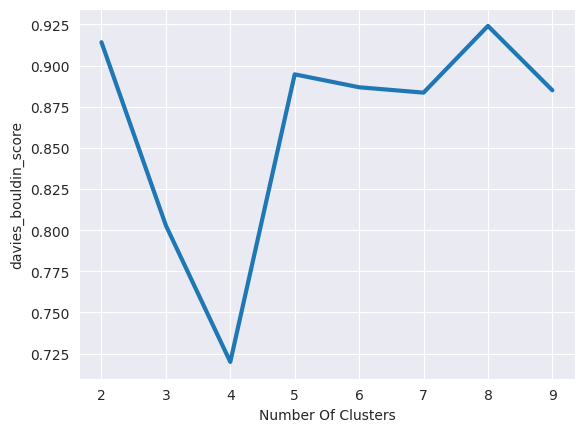

In [67]:
# Calculate davies_bouldin_score for kmeans
kmeans_davies_score = 100
kmeans_davies_n = 100
davis_coefficient = []
for k in range(2, 10) :
    kmeans = KMeans(n_clusters=k, **kmeans_set).fit(pcs_df2)
    score = davies_bouldin_score(pcs_df2, kmeans.labels_)
    davis_coefficient.append(score)
    if score < kmeans_davies_score :
        kmeans_davies_score = score
        kmeans_davies_n = k
    else :
        continue
print('davies_bouldin_score : ', kmeans_davies_score)
print('Best n_cluster : ', kmeans_davies_n)

plt.plot(range(2, 10), davis_coefficient, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

##### MiniBatchKMeans

In [68]:
list_mini = []
for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    list_mini.append(mini.inertia_)

In [69]:
print('Maximum inertia', max(list_mini))
print('Number of clusters :', list_mini.index(max(list_mini))+2)
print('_'*50)
print('Minimum inertia', min(list_mini))
print('Number of clusters :', list_mini.index(min(list_mini))+2)

Maximum inertia 958.7278098506437
Number of clusters : 2
__________________________________________________
Minimum inertia 196.52577096625114
Number of clusters : 9


In [70]:
k1 = KneeLocator(range(2, 10), list_mini, curve='convex', direction='decreasing')
k1.elbow

np.int64(4)

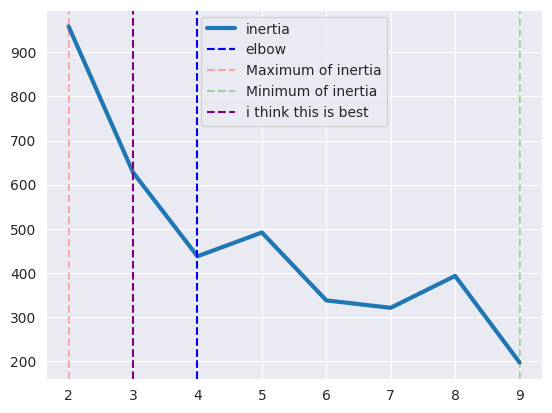

In [71]:
plt.plot(range(2, 10), list_mini, linewidth=3, label='inertia')
plt.xticks(range(2, 10 , 1))
plt.axvline(x=k1.elbow, ls='--', label='elbow', c='b')
plt.axvline(x=list_mini.index(max(list_mini))+2, alpha=0.3, ls='--', label='Maximum of inertia', c='r')
plt.axvline(x=list_mini.index(min(list_mini))+2, alpha=0.3, ls='--', label='Minimum of inertia', c='g')
plt.axvline(x=3, ls='--',  label='i think this is best', color='purple')
plt.legend()
plt.show()

Silhouette

Silhouette Score :  0.5017453182007651
Best n_clusters :  2


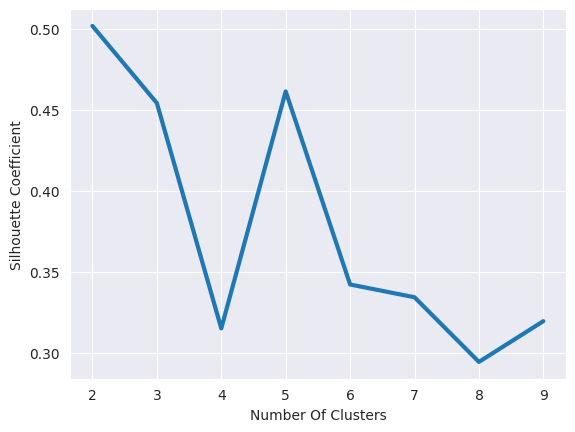

In [72]:
mini_sil_score = 0
mini_sil_n = 0
mini_sil_coef = []

for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  silhouette_score(pcs_df2, mini.labels_)
    mini_sil_coef.append(score)
    if score > mini_sil_score :
        mini_sil_score = score
        mini_sil_n = k
    else :
        continue

print('Silhouette Score : ', mini_sil_score)
print('Best n_clusters : ', mini_sil_n)

plt.plot(range(2, 10), mini_sil_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

calinski_harabasz_score

calinski_harabasz_score :  119.83678162449822
Best n_clusters :  5


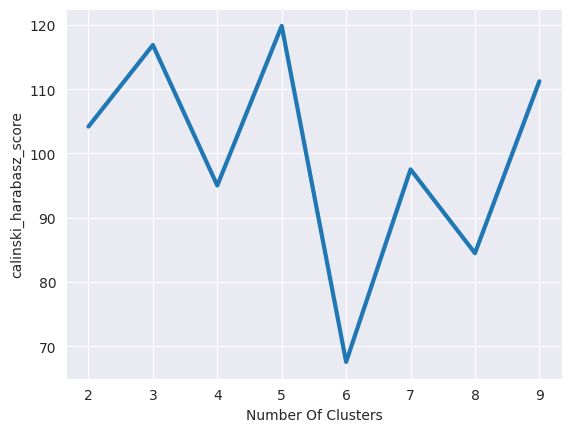

In [73]:
mini_ch_score = 0
mini_ch_n = 0
mini_ch_coef = []

for k in range(2, 10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  calinski_harabasz_score(pcs_df2, mini.labels_)
    mini_ch_coef.append(score)
    if score > mini_ch_score :
        mini_ch_score = score
        mini_ch_n = k
    else :
        continue

print('calinski_harabasz_score : ', mini_ch_score)
print('Best n_clusters : ', mini_ch_n)

plt.plot(range(2, 10), mini_ch_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

mini_ca_score = max(mini_ch_coef)

davies_bouldin_score

davies_bouldin_score :  0.8045030812880597
Best n_clusters :  5


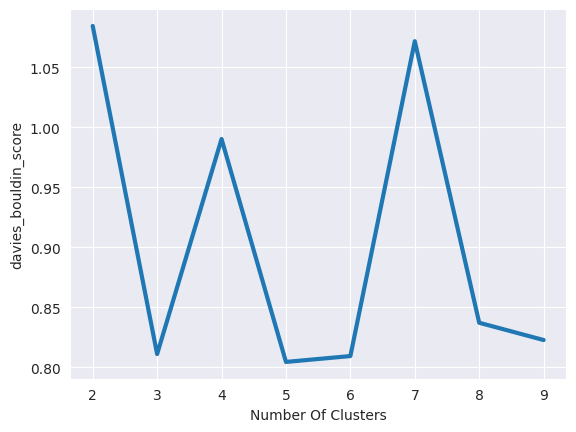

In [74]:
mini_davies_score = 100
mini_davies_n = 100
mini_davies_coef = []

for k in range(2,10) :
    mini = MiniBatchKMeans(n_clusters=k)
    mini.fit(pcs_df2)
    score =  davies_bouldin_score(pcs_df2, mini.labels_)
    mini_davies_coef.append(score)
    if score < mini_davies_score :
        mini_davies_score = score
        mini_davies_n = k
    else :
        continue

print('davies_bouldin_score : ', mini_davies_score)
print('Best n_clusters : ', mini_davies_n)

plt.plot(range(2, 10), mini_davies_coef, linewidth=3)
plt.xticks(range(2, 10))
plt.xlabel('Number Of Clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

mini_davies_score = max(mini_davies_coef)

##### DBSCAN

In [75]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_noise = []
list_eps = []

for i in range(0, 40, 1):
    e = 0.5 + (i*0.05)
    dbscan = DBSCAN(eps=e)
    dbscan.fit(pcs_df2)

    labels = dbscan.labels_
    if len(labels) > 1 :

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ > 1 :

            list_eps.append(e)
            list_n.append(n_clusters_)
            list_noise.append(n_noise_)
            sil = silhouette_score(pcs_df2, labels)
            davies = davies_bouldin_score(pcs_df2, labels)
            ch = calinski_harabasz_score(pcs_df2, labels)

            list_sil.append(sil)
            list_davies.append(davies)
            list_ch.append(ch)

            print("eps = ", e)
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)
            print('Silhouette : ', sil)
            print('Davis : ', davies)
            print('CH Score : ',   ch)
            print('\n____________________________________________________________________\n')
print("END")

eps =  0.5
Estimated number of clusters: 3
Estimated number of noise points: 64
Silhouette :  0.160536801922381
Davis :  1.4268182993628389
CH Score :  22.02028630841682

____________________________________________________________________

eps =  0.6
Estimated number of clusters: 2
Estimated number of noise points: 53
Silhouette :  0.23228582367127057
Davis :  1.7991613338354249
CH Score :  20.986201993603856

____________________________________________________________________

eps =  0.65
Estimated number of clusters: 2
Estimated number of noise points: 44
Silhouette :  0.2825773413914229
Davis :  1.7720749526429718
CH Score :  27.63458403872533

____________________________________________________________________

eps =  0.7
Estimated number of clusters: 2
Estimated number of noise points: 31
Silhouette :  0.29205769424256983
Davis :  1.8937773846462862
CH Score :  23.024856203482152

____________________________________________________________________

END


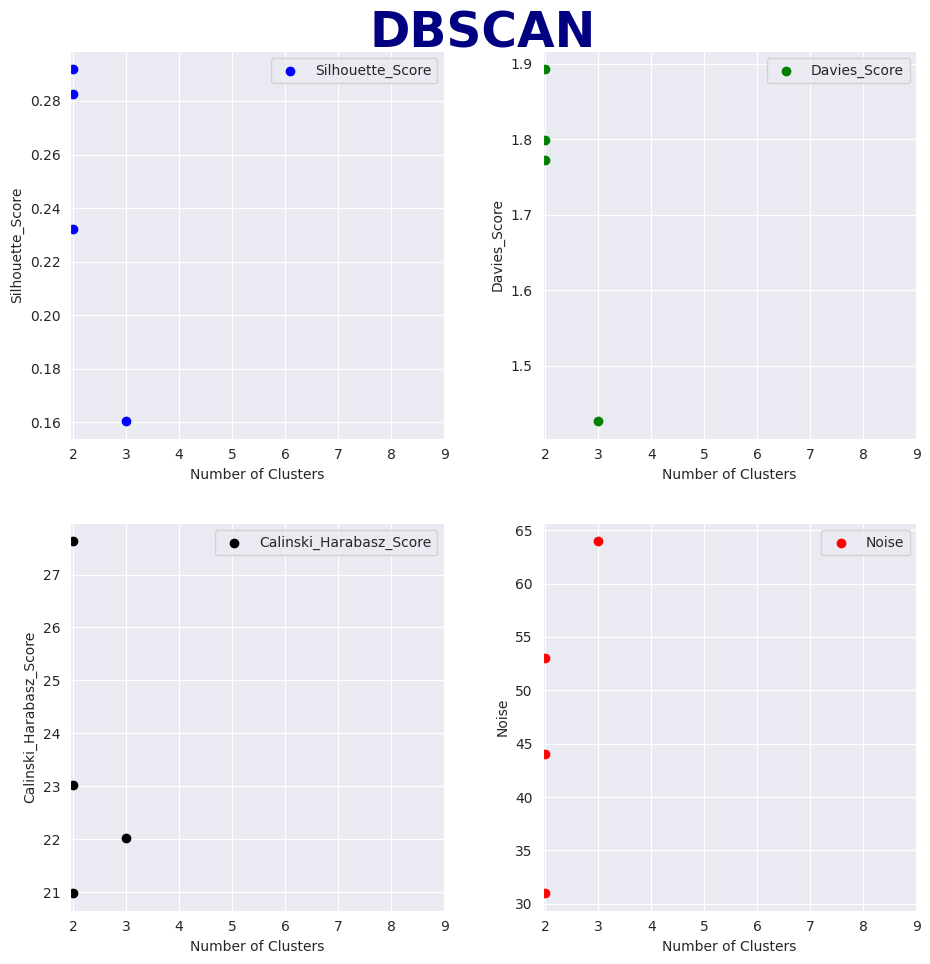

In [76]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('DBSCAN', fontsize=35, color='navy', fontweight='bold')


ax[0, 0].scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax[0, 0].legend()
ax[0, 0].set_xlabel('Number of Clusters')
ax[0, 0].set_ylabel('Silhouette_Score')
ax[0, 0].set_xticks(range(2, 10, 1))

ax[0, 1].scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax[0, 1].legend()
ax[0, 1].set_xlabel('Number of Clusters')
ax[0, 1].set_ylabel('Davies_Score')
ax[0, 1].set_xticks(range(2, 10, 1))


ax[1, 0].scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax[1, 0].legend()
ax[1, 0].set_xlabel('Number of Clusters')
ax[1, 0].set_ylabel('Calinski_Harabasz_Score')
ax[1, 0].set_xticks(range(2, 10, 1))

ax[1, 1].scatter(list_n, list_noise, label='Noise', color='red') # plot 4 : Noise
ax[1, 1].legend()
ax[1, 1].set_xlabel('Number of Clusters')
ax[1, 1].set_ylabel('Noise')
ax[1, 1].set_xticks(range(2, 10, 1))

plt.show()

In [77]:
dbscan_sil_score = max(list_sil)
dbscan_sil_n = 2

dbscan_davies_score = max(list_davies)
dbscan_davies_n = 2

dbscan_ch_score = max(list_ch)
dbscan_ch_n = 3

Best n_cluster = 2

##### Mean Shift

In [78]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_noise = []
list_eps = []

for i in range(2, 1000, 50) :
    bandwidth = estimate_bandwidth(pcs_df2, quantile=0.2, n_samples=i)
    if bandwidth > 0.5 :
        meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(pcs_df2)

        labels = meanshift.labels_
        if len(np.unique(labels)) > 1 :
            print('n_sample : ', n, 'Started')
            print('i=', i)

            # Number of clusters in labels, ignoring noise if present.

            n = len(np.unique(meanshift.labels_))

            sil = silhouette_score(pcs_df2, meanshift.labels_)
            davies = davies_bouldin_score(pcs_df2, meanshift.labels_)
            ch = calinski_harabasz_score(pcs_df2, meanshift.labels_)

            list_sil.append(sil)
            list_davies.append(davies)
            list_ch.append(ch)
            list_n.append(n)
            print("sil : ", sil)
            print('davies : ', davies)
            print('ch : ', ch)
            print('_'*45)



print('END')

n_sample :  10 Started
i= 52
sil :  0.4303004125703701
davies :  0.5170458391287718
ch :  101.62438393675387
_____________________________________________
n_sample :  11 Started
i= 102
sil :  0.3782867724873858
davies :  0.5809703044556069
ch :  85.82668978724855
_____________________________________________
n_sample :  10 Started
i= 152
sil :  0.27550034307371646
davies :  0.7002189519611489
ch :  43.680055733253354
_____________________________________________
n_sample :  9 Started
i= 202
sil :  0.27550034307371646
davies :  0.7002189519611489
ch :  43.680055733253354
_____________________________________________
n_sample :  9 Started
i= 252
sil :  0.27550034307371646
davies :  0.7002189519611489
ch :  43.680055733253354
_____________________________________________
n_sample :  9 Started
i= 302
sil :  0.27550034307371646
davies :  0.7002189519611489
ch :  43.680055733253354
_____________________________________________
n_sample :  9 Started
i= 352
sil :  0.27550034307371646
davies : 

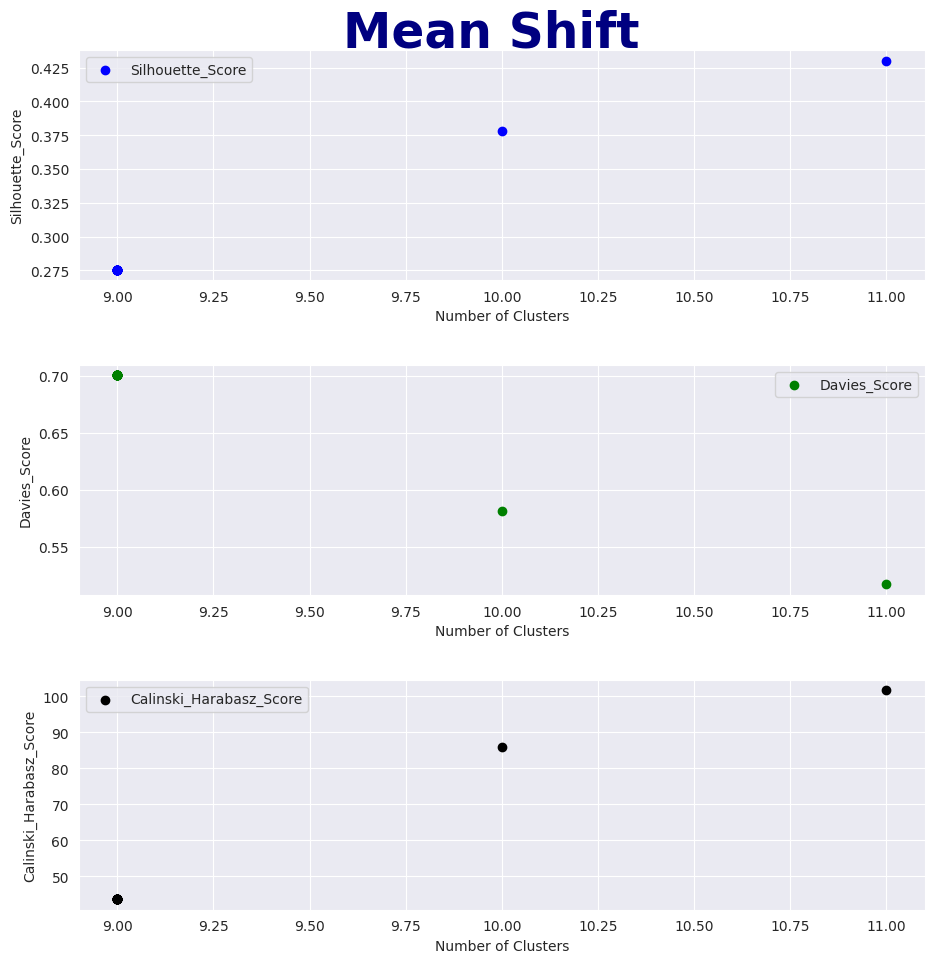

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('Mean Shift', fontsize=35, color='navy', fontweight='bold')


ax1.scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax1.legend()
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette_Score')


ax2.scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax2.legend()
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Davies_Score')



ax3.scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax3.legend()
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Calinski_Harabasz_Score')



plt.show()

In [80]:
print('Best n_cluster by mean shift : ', list_n[list_sil.index(max(list_sil))])

Best n_cluster by mean shift :  11


In [81]:
meanshift_sil_score = max(list_sil)
meanshift_davies_score = max(list_davies)
meanshift_ch_score = max(list_ch)

##### AffinityPropagation

In [82]:
list_sil = []
list_davies = []
list_ch = []
list_n = []
list_damp = []
c = 1
for i in range(0, 10) :
    damp = 0.5 + (0.05*i)
    print('damp : ', damp, 'started, c=', c )
    c+=1

    affinity = AffinityPropagation(damping=damp).fit(pcs_df2)

    labels = affinity.labels_
    if len(np.unique(labels)) > 1 :
        n = len(np.unique(meanshift.labels_))

        sil = silhouette_score(pcs_df2, labels)
        davies = davies_bouldin_score(pcs_df2, labels)
        ch = calinski_harabasz_score(pcs_df2, labels)

        list_sil.append(sil)
        list_davies.append(davies)
        list_ch.append(ch)
        list_n.append(n)
        print("sil : ", sil)
        print('davies : ', davies)
        print('ch : ', ch)
        print('_'*45)
print('END')

damp :  0.5 started, c= 1
sil :  0.29803812377101646
davies :  0.7144570824904151
ch :  154.9662743392438
_____________________________________________
damp :  0.55 started, c= 2
sil :  0.31841689132178147
davies :  0.6796997758239824
ch :  159.01854754393887
_____________________________________________
damp :  0.6 started, c= 3
sil :  0.3161210788146505
davies :  0.6850659794703015
ch :  158.74009817399045
_____________________________________________
damp :  0.65 started, c= 4
sil :  0.3150743006691251
davies :  0.6876613068109417
ch :  158.8003195865849
_____________________________________________
damp :  0.7 started, c= 5
sil :  0.31129112563408673
davies :  0.6871106136116865
ch :  157.7354679869218
_____________________________________________
damp :  0.75 started, c= 6
sil :  0.3150743006691251
davies :  0.6876613068109418
ch :  158.80031958658483
_____________________________________________
damp :  0.8 started, c= 7
sil :  0.31129112563408673
davies :  0.6871106136116865
ch 

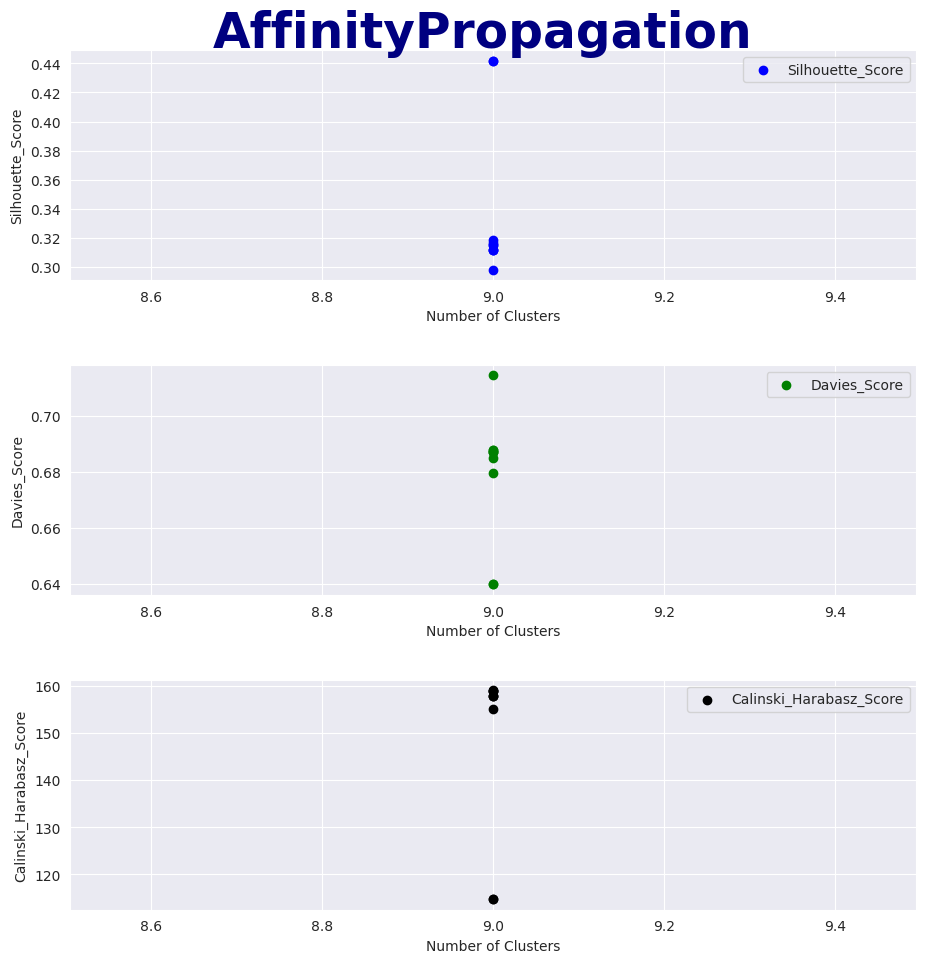

In [83]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
fig.tight_layout(pad=4.0)
fig.suptitle('AffinityPropagation', fontsize=35, color='navy', fontweight='bold')


ax1.scatter(list_n, list_sil, label='Silhouette_Score', color='blue') # plot 1 : silhouette
ax1.legend()
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette_Score')
# ax1.set_xticks(range(48, 63, 2))

ax2.scatter(list_n, list_davies, label='Davies_Score', color='green') # plot 2 : Davies
ax2.legend()
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Davies_Score')
# ax2.set_xticks(range(2, 40, 2))


ax3.scatter(list_n, list_ch, label='Calinski_Harabasz_Score', color='black') # plot 3 : Calinski_Harabasz_Score
ax3.legend()
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Calinski_Harabasz_Score')
# ax3.set_xticks(range(2, 40, 2))

# ax[1, 1].plot(list_n, list_noise, label='Noise', color='red') # plot 4 : Noise
# ax[1, 1].legend()
# ax[1, 1].set_xlabel('Number of Clusters')
# ax[1, 1].set_ylabel('Noise')
# ax[1, 1].set_xticks(range(2, 40, 2))

plt.show()

In [84]:
affiniti_sil_score = max(list_sil)
affiniti_davies_score = max(list_davies)
affiniti_ch_score = max(list_ch)

In [85]:
print('Best n_cluster by mean shift : ', list_n[list_sil.index(max(list_sil))])

Best n_cluster by mean shift :  9


#### **Finding best n_cluster**

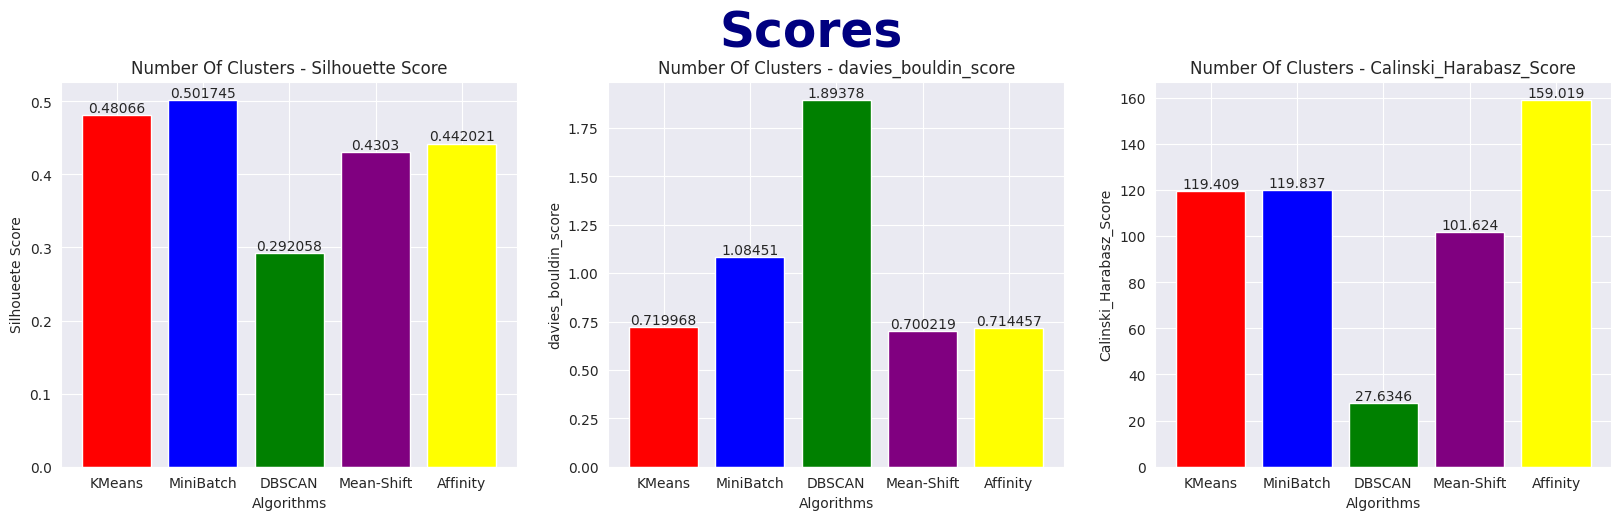

In [86]:
labels = ['KMeans', 'MiniBatch', 'DBSCAN', 'Mean-Shift', 'Affinity']
color = ['red', 'blue', 'green', 'purple', 'yellow']
sil = [kmeans_sil_score, mini_sil_score, dbscan_sil_score, meanshift_sil_score, affiniti_sil_score]
davies = [kmeans_davies_score, mini_davies_score, dbscan_davies_score, meanshift_davies_score, affiniti_davies_score]
ch = [kmeans_ch_score, mini_ch_score, dbscan_ch_score, meanshift_ch_score , affiniti_ch_score]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Scores', fontsize=35, color='navy', y=1.025, fontweight='bold')

# ax1 : Silhouette Score
bar_container = ax1.bar(labels, sil, color=color, edgecolor="white")
ax1.bar_label(bar_container)
ax1.set(xlabel='Algorithms', ylabel='Silhoueete Score', title='Number Of Clusters - Silhouette Score')

# ax2 : Davies Bouldin Score
bar_container = ax2.bar(labels, davies, color=color, edgecolor="white")
ax2.bar_label(bar_container)
ax2.set(xlabel='Algorithms', ylabel='davies_bouldin_score', title='Number Of Clusters - davies_bouldin_score')

# ax3 : Calinski Harabasz Score
bar_container = ax3.bar(labels, ch, color=color, edgecolor="white")
ax3.bar_label(bar_container)
ax3.set(xlabel='Algorithms', ylabel='Calinski_Harabasz_Score', title='Number Of Clusters - Calinski_Harabasz_Score')


plt.show()

number of clusters :
- KMeans : 4
- MiniBatch : 5
- DBSCAN : 2, 3
- MeanShift : 11
- Affinity : 9

let's test them all

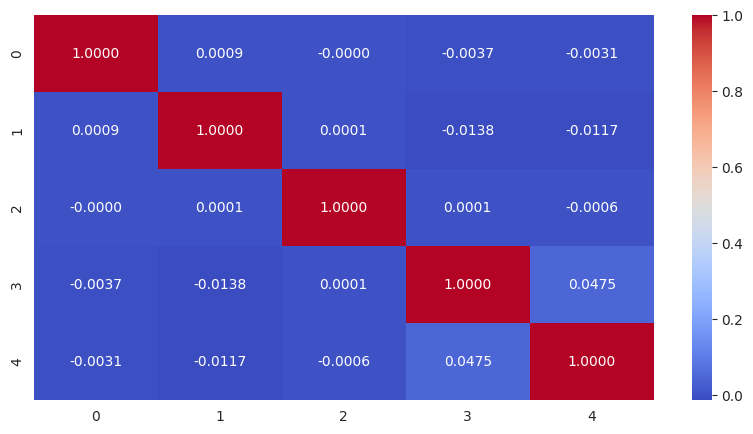

In [87]:
plt.figure(figsize = (10,5))
sns.heatmap(corrmat, annot = True, cmap='coolwarm', fmt='.4f', linecolor='white')
plt.show()

we use PC1 as common feature for plotting

In [88]:
df1 = pcs_df2.copy()

KMeans & n_cluster = 2

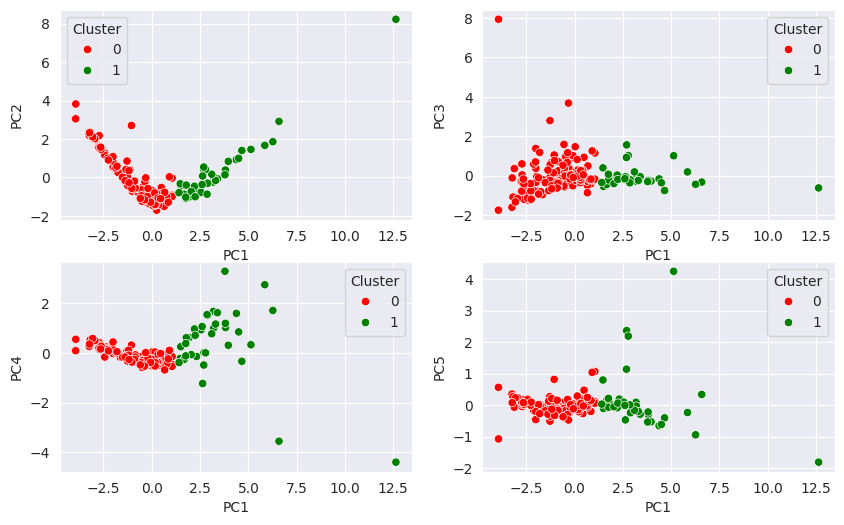

In [91]:
df1 = pcs_df2.copy()

kmeans_set = {
    'init' : 'random',
    'n_init' : 'auto',
    'max_iter' : 300,
    'random_state' : 42
}

kmeans = KMeans(n_clusters=2, **kmeans_set)
kmeans.fit(df1)

df1['Cluster'] = kmeans.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b'])
plt.show()

KMeans & n_cluster = 4

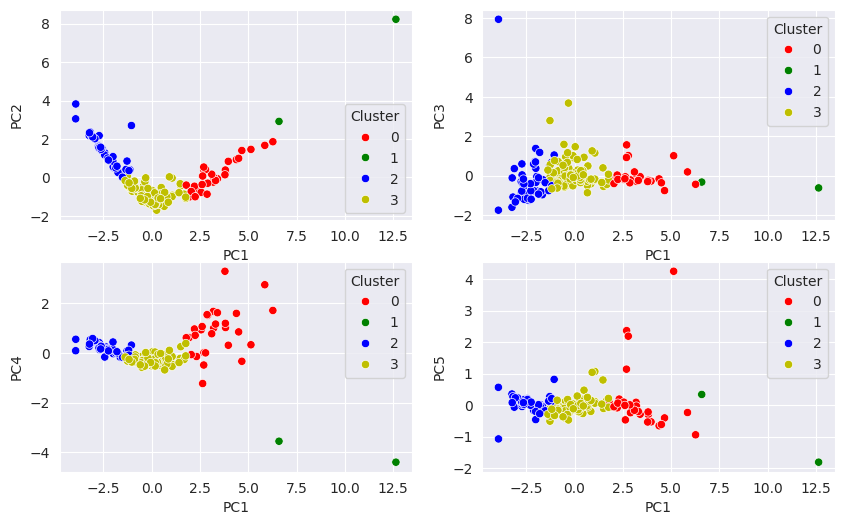

In [90]:
df1 = pcs_df2.copy()

kmeans_set = {
    'init' : 'random',
    'n_init' : 'auto',
    'max_iter' : 300,
    'random_state' : 42
}

kmeans = KMeans(n_clusters=4, **kmeans_set)
kmeans.fit(df1)

df1['Cluster'] = kmeans.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

DBSCAN & n_cluster = 3

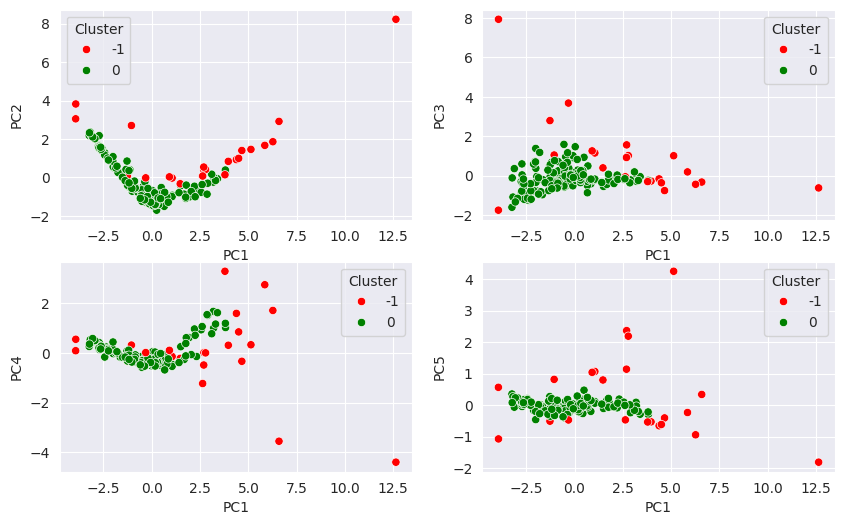

In [92]:
df1 = pcs_df2.copy()

# eps =  0.95
# Estimated number of clusters: 3
# Estimated number of noise points: 60
# Silhouette :  0.1479630301553322
# Davis :  2.192426772968678
# CH Score :  22.854210861478446

dbscan = DBSCAN(eps =  0.95).fit(df1)

df1['Cluster'] = dbscan.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b'])
plt.show()

DBSCAN & n_cluster = 4

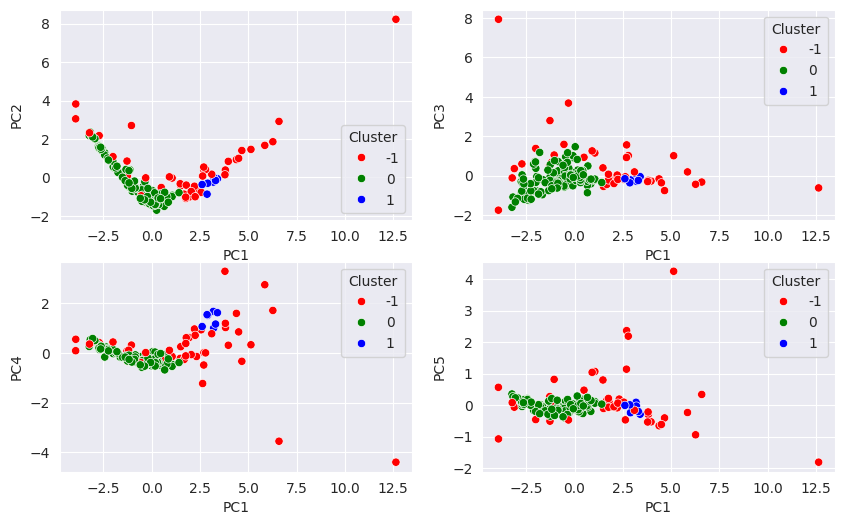

In [93]:
df1 = pcs_df2.copy()

# eps =  0.65
# Estimated number of clusters: 4
# Estimated number of noise points: 140
# Silhouette :  -0.3039203906607828
# Davis :  1.8394219851742957
# CH Score :  2.8722294203023697

dbscan = DBSCAN(eps =  0.65).fit(df1)

df1['Cluster'] = dbscan.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

MeanShift & n_cluster = 11

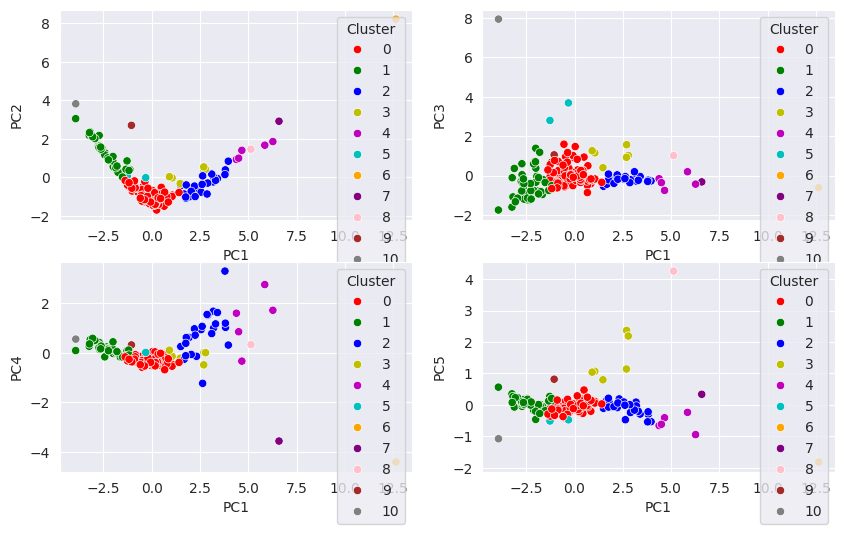

In [99]:
df1 = pcs_df2.copy()

bandwidth = estimate_bandwidth(df1, quantile=0.2, n_samples=52)
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(df1)

df1['Cluster'] = meanshift.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink', 'brown', 'gray'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink', 'brown', 'gray'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink', 'brown', 'gray'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink', 'brown', 'gray'])
plt.show()

MiniBatch & n_cluster = 4

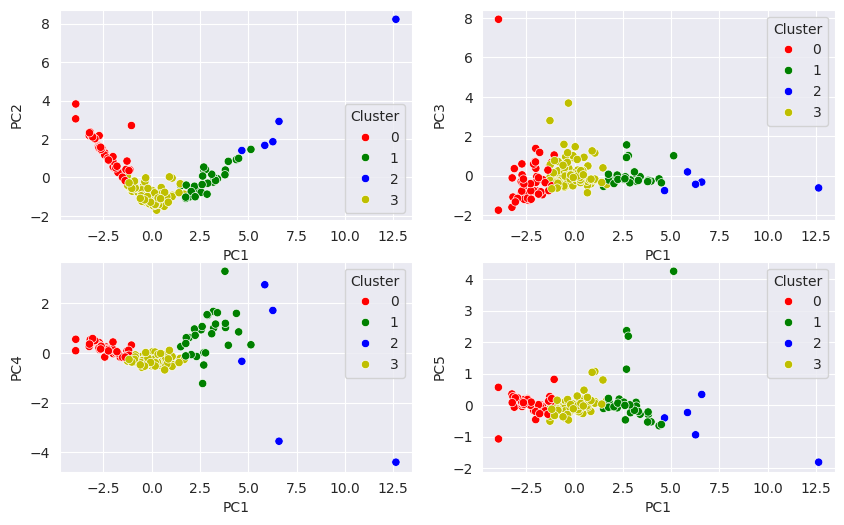

In [98]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=4)
mini.fit(df1)


df1['Cluster'] = mini.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y'])
plt.show()

MiniBatch & n_cluster = 5

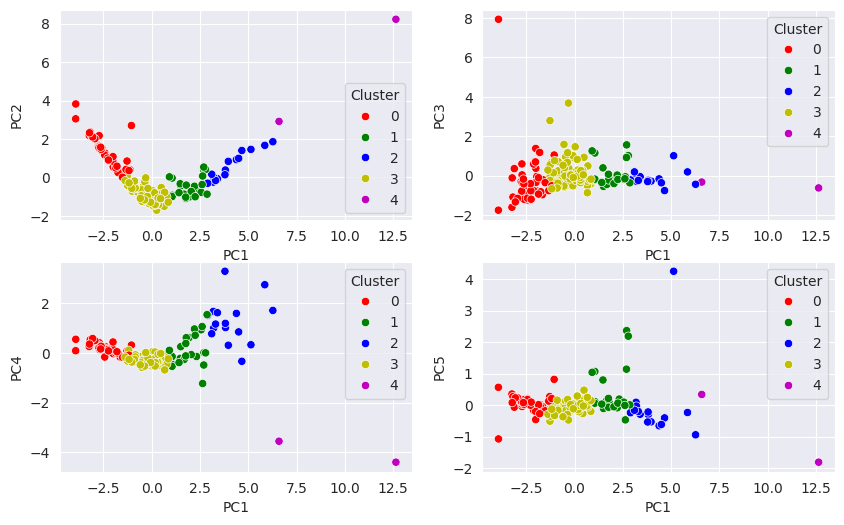

In [97]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=5)
mini.fit(df1)

df1['Cluster'] = mini.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm'])
plt.show()

Affinity & n_cluster = 9

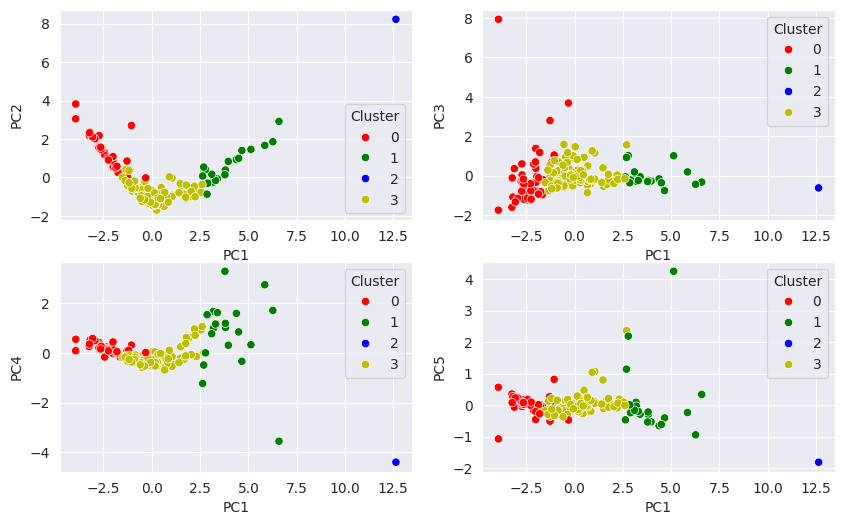

In [100]:
df1 = pcs_df2.copy()

affinity = AffinityPropagation(damping=0.95).fit(df1)


df1['Cluster'] = affinity.fit_predict(df1)

fig, ax = plt.subplots(2, 2, figsize=(10, 6))
sns.scatterplot(data=df1, x='PC1', y='PC2', ax=ax[0, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink'])
sns.scatterplot(data=df1, x='PC1', y='PC3', ax=ax[0, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink'])
sns.scatterplot(data=df1, x='PC1', y='PC4', ax=ax[1, 0], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink'])
sns.scatterplot(data=df1, x='PC1', y='PC5', ax=ax[1, 1], hue='Cluster', palette=['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink'])
plt.show()

best choises (base on plots):
- KMean(n_cluster=2)
- KMean(n_cluster=4)
- MiniBatch(n_cluster=2) <--- Best

In [101]:
df1 = pcs_df2.copy()

mini = MiniBatchKMeans(n_clusters=2)
mini.fit(df1)

df1['Cluster'] = mini.fit_predict(df1)

In [102]:
df1.insert(0, 'country', country)
df1

,country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1
...,...,...,...,...,...,...,...
162,Vanuatu,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,0
163,Venezuela,-0.314505,-0.019143,3.680854,0.016772,-0.475066,1
164,Vietnam,-0.594560,-1.084130,0.528668,-0.478067,-0.373132,1
165,Yemen,-1.802840,0.584669,1.179551,0.051510,-0.274608,0


#### Clusters:
- 0 : Poor Countries
- 1 : Rich Countries

In [103]:
df1.Cluster.replace({
    0 : 'Poor',
    1 : 'Rich'
}, inplace=True)

Poor Countries

In [104]:
poor = df1[df1.Cluster=='Poor']
poor

,country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,Poor
3,Angola,-2.723472,2.174966,0.597397,0.417695,0.056694,Poor
12,Bangladesh,-1.015269,-0.713954,-0.102950,-0.354866,-0.254570,Poor
17,Benin,-2.364235,1.173529,-1.250741,0.242827,0.149386,Poor
19,Bolivia,-1.018733,-0.429274,0.052346,-0.192257,-0.165402,Poor
...,...,...,...,...,...,...,...
155,Uganda,-2.621682,1.462407,-0.413948,0.271157,0.025706,Poor
161,Uzbekistan,-1.032296,-0.567502,0.764642,-0.364002,-0.332114,Poor
162,Vanuatu,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251,Poor
165,Yemen,-1.802840,0.584669,1.179551,0.051510,-0.274608,Poor


Rich Countries

In [105]:
rich = df1[df1.Cluster=='Rich']
rich

,country,PC1,PC2,PC3,PC4,PC5,Cluster
1,Albania,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,Rich
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,Rich
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,Rich
5,Argentina,0.035950,-0.685692,1.468419,0.046032,-0.093193,Rich
6,Armenia,-0.334457,-1.278617,0.190805,-0.477019,-0.253557,Rich
...,...,...,...,...,...,...,...
158,United Kingdom,2.607258,-0.367546,-0.153903,1.065044,-0.010749,Rich
159,United States,3.786191,0.141650,-0.297774,3.291248,-0.538677,Rich
160,Uruguay,0.455607,-1.099326,0.045118,-0.019662,-0.029094,Rich
163,Venezuela,-0.314505,-0.019143,3.680854,0.016772,-0.475066,Rich
